# Evaluation metrics in Binary classification problems

We need some kind of evaluation metric to evaluate how good our trained model is doing on unseen data (validation set). Following are the metrics which are commonly used for classification problems:

1. Accuracy score
2. Precision
3. Recall
4. Area under ROC (Receiver Operating characteristics) or AUC
5. Log loss

Knowing above evaluation metrics is good, but we should also know when to use which metric. These metrics usage depend on the problem and mainly target we're trying to predict.

Consider, a **binary classification problem** i.e. *the target variable is divided into 2 classes*. An example could be a classification problem for given chest X-ray images to classify if there is pneumothorax in the image. Pneumothorax is a condition where the lung is collapsed and it can be seen in the chest X-ray image.

![Normal vs Pneumothorax](https://assets.aboutkidshealth.ca/akhassets/Pneumothorax_XRAY_MEDIMG_PHO_EN.png?RenditionID=19)

Let's say we're given 100 images with equal number of Pneumothorax and non-Pneumothorax images. For our training purpose, we divide the dataset into training and validation sets (7:3) with same ratio as in original dataset.

Thus, we'll have 70 images in training set and 30 images in validation set. Then we train our model on 70 images and we'd like to evaluate the model using validation set. Let's look at our Evaluation metrics for classification.

## 1. Accuracy score

Accuracy score is the ratio of correct predictions out of total in the target. Let's say in our above example, out of 30 images in validation set, the model predicts 27 images correctly. Then we can say model predicts with 90% accuracy or 0.9 accuracy score.

In [3]:
def accuracy_score_v1(y_true, y_pred):
    """
    Computes the accuracy score
    
    :param y_true: Actual target values
    :param y_pred: Predicted values from the model
    :returns: the accuracy score
    """
    # Assign correct variable to zero, which will contain total correct predictions out of the actual values 
    correct = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == yp:
            correct += 1
    return 1.0 * correct / len(y_true)

In [4]:
# Let's check the accuracy score for the sample data
targets = [1, 0, 0, 1, 0, 0, 1, 1, 1, 0]
preds   = [0, 1, 0, 1, 0, 0, 1, 1, 1, 0]

accuracy_score_v1(targets, preds)

0.8

Above, we can see that our `accuracy_score_v1` method gives the accuracy score of 0.8 or 80%.

`sklearn` python package provides a function to calculate the accuracy score which we can use to cross check.

In [5]:
from sklearn.metrics import accuracy_score

accuracy_score(targets, preds)

0.8

from `sklearn` package's method we get same accuracy score which means our implementation of accuracy score is correct.

Great!!!

Now, consider another example, where we are given a dataset of 100 images in which only 10 images has Pneumothorax and rest are non-Pneumothorax. If we divide the dataset into training and validation as 80:20 with equal ratio of images. Then training set will contain 72 images of non-Pneumothorax and 8 images of Pneumothorax. Similarly, validation set will contain 18 images of non-Pneumothorax and 2 images of Pneumothorax.

In the above case, if we always predict non-Pneumothorax for any image, then still we'll get 90% accuracy without building a model. But would that be a good case? Definitely not. So we can see that having evaluation metric as `accuracy_score` for all problems wouldn't work. Specially, not in the cases where target variable is skewed. Here comes the `precision`, `recall`, `F1-score`, etc. for the rescue.

Now, before we move forward with Precision and others, we need to be familiar with some terminologies.

**True Positive or TP**: It is defined as if the model predicts `True` where the actual value is also `True`, then consider it as True Positive.  
**True Negative or TN**: It is defined as if the model predicts `False` where the actual value is also `False`, then consider it as True Negative.  
**False Positive or FP**: It is defined as if the model predicts `True` where the actual value is `False`, then consider it as False Positive.  
**False Negative or FN**: It is defined as if the model predicts `False` where the actual value is `True`, then consider it as False Negative.

In [6]:
def true_positive(y_true, y_pred):
    """
    Computes count of True Positive
    
    :param y_true: Actual target values
    :param y_pred: Predicted values from the model
    :returns: count of true positive
    """
    tp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 1:
            tp += 1
    return tp

def true_negative(y_true, y_pred):
    """
    Computes count of True Negative
    
    :param y_true: Actual target values
    :param y_pred: Predicted values from the model
    :returns: count of true negative
    """
    tn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 0:
            tn += 1
    return tn

def false_positive(y_true, y_pred):
    """
    Computes count of False Positive
    
    :param y_true: Actual target values
    :param y_pred: Predicted values from the model
    :returns: count of false positive
    """
    fp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 1:
            fp += 1
    return fp

def false_negative(y_true, y_pred):
    """
    Computes count of False Negative
    
    :param y_true: Actual target values
    :param y_pred: Predicted values from the model
    :returns: count of false negative
    """
    fn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 0:
            fn += 1
    return fn

In [7]:
# Let's take same values above targets and preds.
targets = [1, 0, 0, 1, 0, 0, 1, 1, 1, 0]
preds   = [0, 1, 0, 1, 0, 0, 1, 1, 1, 0]

# We know that, TP = 4, TN = 4, FP = 1, FN = 1.
# Let's see what our functions gives
print(f'TP:{true_positive(targets, preds)}')
print(f'TN:{true_negative(targets, preds)}')
print(f'FP:{false_positive(targets, preds)}')
print(f'FN:{false_negative(targets, preds)}')

TP:4
TN:4
FP:1
FN:1


Voila!! we have same values as we expected.

Now, as you might be thinking, couldn't we define Accuracy score using terms TP, TN, FP, FN? Yes we can and here's the definition:

$ \text{accuracy_score} = \dfrac{TP + TN}{TP + TN + FP + FN} $

We'll define our new function for `accuracy_score` using these terms internally.

In [8]:
def accuracy_score_v2(y_true, y_pred):
    """
    Computes the accuracy score
    
    :param y_true: Actual target values
    :param y_pred: Predicted values from the model
    :returns: calculated accuracy score from the given values
    """
    
    tp = true_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    
    return (tp + tn) / (tp + tn + fp + fn)

In [9]:
print(f'Acc score (v1)     : {accuracy_score_v1(targets, preds)}')
print(f'Acc score (v2)     : {accuracy_score_v2(targets, preds)}')
print(f'Acc score (sklearn): {accuracy_score(targets, preds)}')

Acc score (v1)     : 0.8
Acc score (v2)     : 0.8
Acc score (sklearn): 0.8


Now, let's deep dive into other Evaluation metrics for binary classification.

## 2. Precision

<img src="https://upload.wikimedia.org/wikipedia/commons/2/26/Precisionrecall.svg" alt="Precision vs Recall" title="Precision vs Recall" style="height:750px" align="right" />
*Mathematically, Precision is defined as the fraction of relevant instances among all retrieved instances.*

In simple terms, it can be defined as the ratio of correctly predicted positives out of total predicted positives. 

$ Precision = \dfrac{TP}{TP+FP} $

This metric and others as well are helpful in case of skewed target variable. Considering an example above, our accuracy was 90% though the Precision would be 0, because there are no True Positive found.

In [10]:
def precision(y_true, y_pred):
    """
    Computes the precision score
    
    :param y_true: Actual target values
    :param y_pred: Predicted values from the model
    :returns: Precision score for the given values
    """
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    return 1.0*tp / (tp + fp)

In [11]:
# Consider another example to actually show power of Precision over Accuracy score
targets = [1, 0, 0, 0, 0, 0, 1, 0, 0, 0]
preds   = [1, 0, 0, 0, 0, 0, 0, 0, 0, 1]

print('Accuracy : {}'.format(accuracy_score_v2(targets, preds)))
print('Precision: {}'.format(precision(targets, preds)))

Accuracy : 0.8
Precision: 0.5


As you can see above, our accuracy is 80% but our precision is just 50% and this conveys that our model is having issues with predicting Positives correctly.

## 3. Recall

*Mathematically, it is defined as the fraction of retrieved instances among all relevant instances.*

It can be defined as the ratio of correctly predicted positives out of all actual positives.

$ Recall = \dfrac{TP}{TP+FN} $

In [12]:
def recall(y_true, y_pred):
    """
    Computes the recall score
    
    :param y_true: Actual target values
    :param y_pred: Predicted values from the model
    :returns: Recall score for the given values
    """
    tp = true_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    return 1.0*tp / (tp + fn)

In [13]:
# Consider another example to actually show power of Precision, Recall over Accuracy score
targets = [1, 0, 0, 0, 0, 0, 1, 0, 0, 0]
preds   = [1, 0, 0, 0, 0, 0, 0, 0, 0, 1]

print('Accuracy : {}'.format(accuracy_score_v2(targets, preds)))
print('Precision: {}'.format(precision(targets, preds)))
print('Recall   : {}'.format(recall(targets, preds)))

Accuracy : 0.8
Precision: 0.5
Recall   : 0.5


Now, we have a way to calculate Precision and Recall scores. We know that these both can range from 0 to 1. Both metrics having value closer to 1 suggests that we have a good model. But having look at both the metrics can be confusing when either of them is high and another is low. To rescue this, we have **F1-Score**.

### F1 score

It is another metric which helps us in evaluating the model in case of skewed target variable. It is the simple harmonic mean of Precision and Recall.

$ \text{f1_score} = \dfrac{2PR}{P+R} $, where, `P` = Precision and `R` = Recall

In [14]:
def f1_score(y_true, y_pred):
    """
    Computes the F1 score
    
    :param y_true: Actual target values
    :param y_pred: Predicted values from the model
    :returns: F1 score for the given values
    """
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return (2*p*r)/(p+r)

In [15]:
# Consider another example to actually show power of Precision, Recall over Accuracy score
targets = [1, 0, 0, 0, 0, 0, 1, 0, 0, 0]
preds   = [1, 0, 0, 0, 0, 0, 0, 0, 0, 1]

print('Accuracy : {}'.format(accuracy_score_v2(targets, preds)))
print('Precision: {}'.format(precision(targets, preds)))
print('Recall   : {}'.format(recall(targets, preds)))
print('F1 score : {}'.format(f1_score(targets, preds)))


Accuracy : 0.8
Precision: 0.5
Recall   : 0.5
F1 score : 0.5


We have other terms like `TPR` and `FPR` which helps us in defining other important metrics further.

### True Positive Rate (TPR)

It is same as Recall. This is also known as **Sensitivity**.

$ TPR = \dfrac{TP}{TP+FN} $

In [16]:
def tpr(y_true, y_pred):
    """
    Computes the True Positive Rate (TPR)
    
    :param y_true: Actual target values
    :param y_pred: Predicted values from the model
    :returns: TPR for the given values
    """
    return recall(y_true, y_pred)

### False Positive Rate (FPR)

It is defined as,

$ FPR = \dfrac{FP}{TN+FP} $

In [17]:
def fpr(y_true, y_pred):
    """
    Computes the False Positive Rate (FPR)
    
    :param y_true: Actual target values
    :param y_pred: Predicted values from the model
    :returns: FPR for the given values
    """
    tn = true_negative(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    return 1.0 * fp / (tn + fp)

If we calculate,

$ 1 - FPR $, that gives us **True Negative Rate (TNR)**, also known as **Specificity**.

Now, in case of any classification model, the model predicts probabilities for each class and then we based on a threshold value, calculates the class for which prediction belongs. For an example, if a binary classifier model predicts probability that 0.8 for Class 1 and 0.2 for Class 2. Based on the threshold (say, `0.5` most of the times), we calculate the class to be *Class 1* (since, 0.8 > 0.5).

## 4. Area under ROC (Receiver Operating characteristics) or AUC

So, interesting thing to note above is that our TPR or FPR depends on the threshold values we choose. And that's where it gets trickier to predict class and which threshold to choose that works better in the context of the problem.

For now, let's plot TPR and FPR for all threshold values in between 0 and 1 for the sake of our understanding.

Data for TPR and FPR for each threshold value
   Threshold  TPR  FPR
0       0.00  1.0  1.0
1       0.10  1.0  0.9
2       0.20  1.0  0.7
3       0.30  0.8  0.6
4       0.40  0.8  0.3
5       0.50  0.8  0.3
6       0.60  0.8  0.2
7       0.70  0.6  0.1
8       0.80  0.6  0.1
9       0.85  0.4  0.1


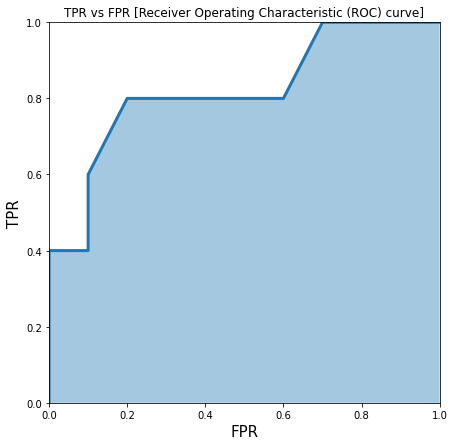

In [39]:
tprs = [] # Empty list to contain values of TPR for corresponding threshold value
fprs = [] # Empty list to contain values of FPR for corresponding threshold value

#actual target values
y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]

# predicted probabilities of a sample being 1
y_pred_probs = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2, 0.85, 0.15, 0.99]

# handmade thresholds
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]

# Book keeping in DataFrame
import pandas as pd
df = pd.DataFrame()

for i, threshold in enumerate(thresholds):
    y_pred = [1 if prob >= threshold else 0 for prob in y_pred_probs]
    
    tpr_ = tpr(y_true, y_pred)
    fpr_ = fpr(y_true, y_pred)
    
    tprs.append(tpr_)
    fprs.append(fpr_)
    
    temp = pd.DataFrame({'Threshold': threshold,'TPR': tpr_, 'FPR': fpr_}, index=[i])
    df = df.append(temp)

print('Data for TPR and FPR for each threshold value')
print(df.head(10))

import matplotlib.pyplot as plt
    
plt.figure(figsize=(7, 7))
plt.fill_between(fprs, tprs, alpha=0.4)
plt.plot(fprs, tprs, lw=3)
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.title('TPR vs FPR [Receiver Operating Characteristic (ROC) curve]')
plt.show()

Above curve gives us **Receiver Operating Characteristic Curve (ROC curve)** and the **Area under ROC curve** or commonly known as **AUC** is another metric for evaluation.

We can use `sklearn` package to get area under above ROC curve.

In [40]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_true, y_pred_probs)

0.8300000000000001

Let's understand AUC values which are in range of 0 to 1.

+ **AUC = 1**: It implies that the model is a perfect model, ideally. But in real world, it indicates that we have made some mistake in our data processing or validation step and we need to go back and check the process.
+ **AUC = 0**: It implies that the model is worse (Or perfect). Normally, we should try to inverse the probabilities of the predictions, like, if we have probability *p* for positives then convert it to *1-p*.
+ **AUC = 0.5**: It implies that our predictions are completely random. So, for binary classification, if we predict 0.5 for all targets, we get an AUC of 0.5.
+ **AUC < 0.5**: It implies that the model is worse than random. Most of the times, its because we inverted the classes.
+ **AUC closer to 1** is considered good.

AUC is a widely used metric for skewed binary classification tasks in the industry.

We can choose ROC to get better threshold value to predict the classes out of probabilities.

## 5. Log loss

$ \text{Log_Loss} = -1 * [target * log(prediction) + (1 - target) * log(1-prediction)] $  
where, 
+ target is either 0 or 1
+ prediction is the probability of a sample belonging to class 1.

For multiple samples in the dataset, the log-loss over all samples is a mere average of all individual log-losses. Log loss penalizes quite high for an incorrect or far-off prediction i.e. log loss punishes you for being sure and very wrong.

In [44]:
def log_loss(y_true, y_probs):
    """
    Compute the log loss for the given values
    
    :param y_true: Actual target values
    :param y_probs: Predicted probabilities from the model
    :returns Log loss over all given values
    """
    import numpy as np
    eps = 1e-15
    losses = []
    for yt, yp in zip(y_true, y_probs):
        # Adjust the probability
        # 0 is converted to eps or 1e-15
        # 1 is converted to 1-eps or 1-1e-15
        y_pred = np.clip(yp, eps, 1-eps)
        loss = -1.0 * (yt * np.log(y_pred) + (1-yt)*np.log(1-y_pred))
        losses.append(loss)
    # Mean of all losses
    return np.mean(losses)

In [45]:
log_loss(y_true, y_pred_probs)

0.49882711861432294

In [46]:
from sklearn.metrics import log_loss

log_loss(y_true, y_pred_probs)

0.49882711861432294

That's it! Now, we know important Evaluation metrics those are used for Binary classification problems.